In [ ]:
# This project helps in risk prediction of German credit
# I have made changes to convert given details to integer categorical values
# please go through the code for further understanding

In [9]:
#1.importing of required librarires

import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [10]:
# importing data from  CSV file

dataset=pd.read_csv('C:\\Users\\DELL\\Desktop\\MY STUFF\\DATA SCIENCE\\DATA\\Raw data\\german_credit_data.csv')

dataset.shape # prints the shape of the imported dataset
dataset.sample(5) # randomly prints the details of 5 rows
dataset.rename(columns={'Unnamed: 0': 'Sr.no'},inplace=True) # renames first row unnamed to sr.no
dataset.describe(include='all') # gives overall information of all columns
dataset.head() # prints the initial details of data set


,Sr.no,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
dataset.index # prints the range of index
dataset.set_index('Sr.no',inplace=True) # sets the index to Sr.no
dataset.sample(5)# it gives a sample of 5 random data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Sr.no,,,,,,,,,,
733,28,female,2,rent,rich,NaN,2603,24,car,good
772,36,male,3,own,little,NaN,3275,21,car,good
776,37,male,2,own,little,NaN,3535,36,car,good
93,20,male,2,rent,NaN,rich,3617,24,furniture/equipment,good
980,49,male,2,own,little,moderate,8386,30,furniture/equipment,bad


In [12]:
# assuming as good :1 and bad:0 in Risk

risk_mappings={'good':1,'bad':0}
dataset['Risk']=dataset['Risk'].map(risk_mappings) # using mapping technique to convert string category to int category
dataset.head()



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Sr.no,,,,,,,,,,
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [13]:
# converting of age to categorical values
dataset['Age'].describe() # gives information such as count,mean,std etc.....
dataset['Age']=dataset['Age'].fillna('adult') # this fills Nan to adult
cut_points=[19,30,40,50,60,100]
label_names=['adult','middle_age','above_middle_age','old_age','senior_citizen']
# pd.cut is a method to name the range of continuousvalues
dataset['Age']=pd.cut(dataset['Age'],cut_points,labels=label_names)
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Sr.no,,,,,,,,,,
0,senior_citizen,male,2,own,NaN,little,1169,6,radio/TV,1
1,adult,female,2,own,little,moderate,5951,48,radio/TV,0
2,above_middle_age,male,1,own,little,NaN,2096,12,education,1
3,above_middle_age,male,2,free,little,little,7882,42,furniture/equipment,1
4,old_age,male,2,free,little,little,4870,24,car,0


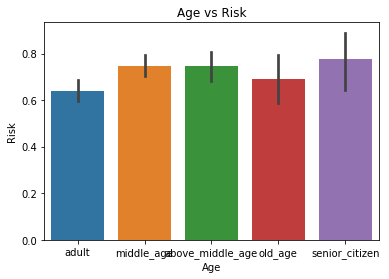

Percentage of people who are adult: 64.05867970660147
Percentage of people who are middle_age:  74.60317460317461
Percentage of people who are above middle age:  74.53416149068323
Percentage of people who are senior citizen:  77.77777777777779


In [14]:
#2.Visulaisation
# visulaizing the given data with seaborn
#draw a bar plot of Age vs Risk

sns.barplot(x="Age", y="Risk", data=dataset)
plt.title('Age vs Risk')
plt.show()

print("Percentage of people who are adult:", dataset["Risk"][dataset["Age"] =='adult'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are middle_age: ",dataset["Risk"][dataset["Age"] =='middle_age'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are above middle age: ",dataset["Risk"][dataset["Age"] =='above_middle_age'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are senior citizen: ",dataset["Risk"][dataset["Age"] =='senior_citizen'].value_counts(normalize = True)[1]*100)

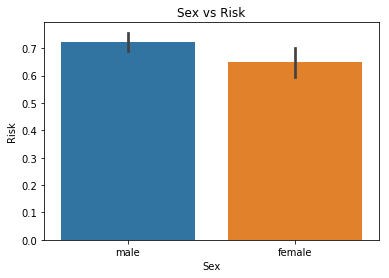

total n.o of people who are good 1    700
Name: Risk, dtype: int64
total n.o of people who are bad 0    300
Name: Risk, dtype: int64
individual n.o of sex who are good 
 male      499
female    201
Name: Sex, dtype: int64
Percentage of female who are good : 64.83870967741936
Percentage of males who are good: 72.31884057971014


In [16]:
#drawing a bar plot of Sex vs Risk
sns.barplot(x="Sex", y="Risk", data=dataset)
plt.title('Sex vs Risk')
plt.show()

# total n.o of sex who was not risk(good)
print('total n.o of people who are good',dataset['Risk'][dataset['Risk']==1].value_counts())
# total n.o of sex who was risk(bad)
print('total n.o of people who are bad',dataset['Risk'][dataset['Risk']==0].value_counts())
# individual n.o of sex who was not risk
print('individual n.o of sex who are good \n',dataset['Sex'][dataset['Risk']==1].value_counts())


#print percentages of females vs. males that are good
print("Percentage of female who are good :", dataset["Risk"][dataset["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who are good:", dataset["Risk"][dataset["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

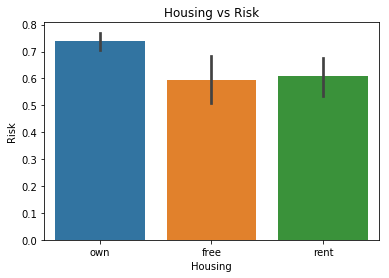

Percentage of people who are having own house: 73.91304347826086
Percentage people who are having free house: 59.25925925925925
Percentage of people who are having rent house:  60.893854748603346


In [17]:
#draw a bar plot of Housing vs Risk
sns.barplot(x="Housing", y="Risk", data=dataset)
plt.title('Housing vs Risk')
plt.show()
#print percentages of housing that are good
print("Percentage of people who are having own house:", dataset["Risk"][dataset["Housing"] == 'own'].value_counts(normalize = True)[1]*100)

print("Percentage people who are having free house:", dataset["Risk"][dataset["Housing"] == 'free'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are having rent house: ", dataset["Risk"][dataset["Housing"] == 'rent'].value_counts(normalize = True)[1]*100)

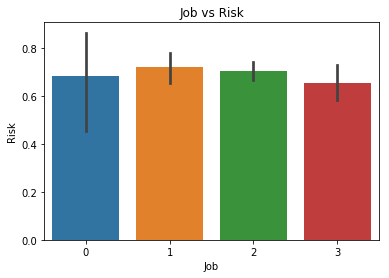

Percentage of people who are unskiled and non-resident: 68.18181818181817
Percentage people who are unskiled and resident: 72.0
Percentage of people who are skilled:  70.47619047619048
Percentage of people who are highly skilled:  65.54054054054053


In [18]:
#draw a bar plot of job vs Risk
#Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
sns.barplot(x="Job", y="Risk", data=dataset)
plt.title('Job vs Risk')
plt.show()

print("Percentage of people who are unskiled and non-resident:", dataset["Risk"][dataset["Job"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage people who are unskiled and resident:", dataset["Risk"][dataset["Job"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of people who are skilled: ", dataset["Risk"][dataset["Job"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of people who are highly skilled: ", dataset["Risk"][dataset["Job"] == 3].value_counts(normalize = True)[1]*100)

In [19]:
# since some values are missed we need to replace Nan

# replacing Nan by ffill method
dataset['Saving accounts'].fillna(method='ffill',inplace=True) 
# prints the unique values in the savings account
dataset['Saving accounts'].unique()
# prints the unique value count
dataset['Saving accounts'].value_counts()

little        740
moderate      127
quite rich     75
rich           57
Name: Saving accounts, dtype: int64

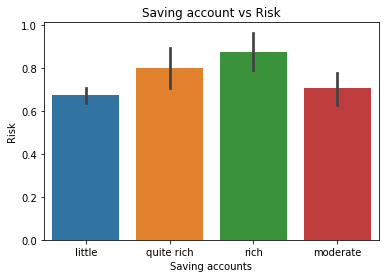

Percentage of people who are little: 67.43243243243244
Percentage people who are quite rich: 80.0
Percentage of people who are rich:  87.71929824561403
Percentage of people who are moderate:  70.86614173228347


In [20]:
#draw a bar plot of Saving accounts vs Risk

sns.barplot(x="Saving accounts", y="Risk", data=dataset)
plt.title('Saving account vs Risk')
plt.show()

print("Percentage of people who are little:", dataset["Risk"][dataset["Saving accounts"] =='little'].value_counts(normalize = True)[1]*100)

print("Percentage people who are quite rich:",dataset["Risk"][dataset["Saving accounts"] =='quite rich'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are rich: ",dataset["Risk"][dataset["Saving accounts"] =='rich'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are moderate: ",dataset["Risk"][dataset["Saving accounts"] =='moderate'].value_counts(normalize = True)[1]*100)

In [21]:
# since some values are missed we need to replace Nan

# replacing Nan by bfill method
dataset['Checking account'].fillna(method='bfill',inplace=True) 
# prints the unique values in the savings account
dataset['Checking account'].unique()
# prints the unique value count
dataset['Checking account'].value_counts()

little      460
moderate    430
rich        110
Name: Checking account, dtype: int64

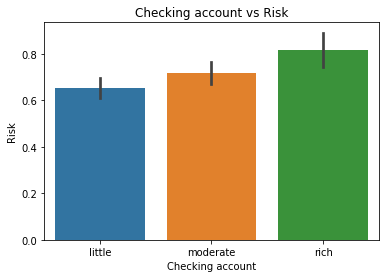

Percentage of people who are little: 65.43478260869566
Percentage of people who are rich:  71.86046511627907
Percentage of people who are moderate:  81.81818181818183


In [22]:
#draw a bar plot of checking accounts vs Risk

sns.barplot(x="Checking account", y="Risk", data=dataset)
plt.title('Checking account vs Risk')
plt.show()

print("Percentage of people who are little:", dataset["Risk"][dataset["Checking account"] =='little'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are rich: ",dataset["Risk"][dataset["Checking account"] =='moderate'].value_counts(normalize = True)[1]*100)

print("Percentage of people who are moderate: ",dataset["Risk"][dataset["Checking account"] =='rich'].value_counts(normalize = True)[1]*100)

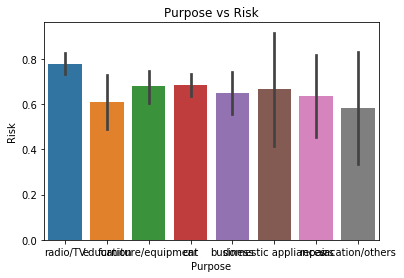

Percentage of people for purpose of rdaio/Tv: 77.85714285714286
Percentage of people for purpose of education:  61.016949152542374
Percentage of people for purpose of furniture/equipment:  67.95580110497238
Percentage of people for purpose of car: 68.5459940652819
Percentage of people for purpose of business: 64.94845360824742
Percentage of people for purpose of domestic appliances: 66.66666666666666
Percentage of people for purpose of vacation/others: 58.333333333333336


In [23]:
#draw a bar plot of purpose vs Risk

sns.barplot(x="Purpose", y="Risk", data=dataset)
plt.title('Purpose vs Risk')
plt.show()

print("Percentage of people for purpose of rdaio/Tv:", dataset["Risk"][dataset["Purpose"] =='radio/TV'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of education: ",dataset["Risk"][dataset["Purpose"] =='education'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of furniture/equipment: ",dataset["Risk"][dataset["Purpose"] =='furniture/equipment'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of car:", dataset["Risk"][dataset["Purpose"] =='car'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of business:", dataset["Risk"][dataset["Purpose"] =='business'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of domestic appliances:", dataset["Risk"][dataset["Purpose"] =='domestic appliances'].value_counts(normalize = True)[1]*100)

print("Percentage of people for purpose of vacation/others:", dataset["Risk"][dataset["Purpose"] =='vacation/others'].value_counts(normalize = True)[1]*100)



In [24]:
# 3.conversion of string category to int categorical
# main part of data cleansing
# now conversion of input features to integer categorical values

# Age conversion by using mapping technique
dataset['Age'].unique() # checks for the unique values in age column
dataset['Age'].fillna('adult',inplace=True)# fillna replaces any Nan to adult
dataset['Age'].unique()

[senior_citizen, adult, above_middle_age, old_age, middle_age]
Categories (5, object): [adult < middle_age < above_middle_age < old_age < senior_citizen]

In [25]:
age_mappings={'senior_citizen':4, 'adult':0, 'above_middle_age':2, 'old_age':3, 'middle_age':1}
dataset['Age']=dataset['Age'].map(age_mappings) # mapping technique for convert into integer categorical values

In [26]:
# Sex conversion to categorical values
dataset['Sex'].unique()
sex_mappings={'male':1,'female':0}
dataset["Sex"]=dataset["Sex"].map(sex_mappings)

In [27]:
# Housing conversion to categorical values
dataset["Housing"].unique()
Housing_mappings={'own':2,'free':1,'rent':0}
dataset["Housing"]=dataset['Housing'].map(Housing_mappings)

In [28]:
# savings account to categorical values

dataset=dataset.dropna()
dataset['Saving accounts'].unique()
saving_mappings={'little':0,'moderate':1,'quite rich':2,'rich':3}
dataset['Saving accounts']=dataset['Saving accounts'].map(saving_mappings)

In [29]:
# checking account to categorical values

dataset['Checking account'].unique()
dataset['Checking account'].describe()
checking_mappings={'little':0,'moderate':1,'rich':2}
dataset['Checking account']=dataset['Checking account'].map(checking_mappings)

In [30]:
# conversion of credited amount to categorical values

# pd.cut method is far better than pd.qcut method when dealing with big continuous input features
cut_points=[0,2000,3000,6000,8000,20000]
labels=['too small','small','big','too big','bigger']
dataset['Credit amount']=pd.cut(dataset['Credit amount'],cut_points,labels=labels)

# now string categorical to int categorical by mapping
amount_mappings={'big':2, 'small':1, "too big":3, "bigger":4, 'too small':0}
dataset['Credit amount']=dataset['Credit amount'].map(amount_mappings)

In [31]:
# conversion of duration to categorical values

# pd.cut method is far better than pd.qcut method ,we can customize range of our own
cut_points=[0,10,20,40,60,100]
labels=[0,1,2,3,4]
dataset['Duration']=pd.cut(dataset['Duration'],cut_points,labels=labels)


In [32]:
# conversion of  purpose to categorical values by mapping technique
amount_mappings={'radio/TV':1, 'education':0, 'furniture/equipment':2, 'car':3, 'business':4,
       'domestic appliances':5, 'repairs':6, 'vacation/others':7}
dataset['Purpose']=dataset['Purpose'].map(amount_mappings)

In [34]:
dataset.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
Sr.no,,,,,,,,,,
515,1,0,2,2,0,0,0,0,3,1
959,0,1,2,1,1,1,2,2,2,1
928,3,1,2,2,0,0,0,2,1,1
571,1,1,2,2,0,0,2,2,1,1
889,1,1,2,0,0,0,3,2,3,1
216,1,1,2,2,0,0,2,1,4,1
391,0,0,1,0,3,1,0,1,2,1
243,0,0,2,2,0,2,0,1,4,1
783,0,0,1,2,1,1,0,1,3,0


In [35]:
#4.training the model
from sklearn.model_selection import train_test_split

testset=dataset['Risk']
dataset=dataset.drop(['Risk'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(dataset,testset,test_size=0.3,random_state=0)

In [36]:
# we try with various machine learning algorthims that which gives more accuracy to our project.
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gaussian)

73.33


In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_logreg)

75.67


In [38]:
# state vector classifier
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

74.33


In [39]:
# perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_perceptron)

71.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [40]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_decisiontree)

60.67


In [41]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

69.33


In [42]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

71.0


In [47]:
# stochastic gradient classifier
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_sgd)

73.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [49]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

75.33


In [50]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron',  
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,75.67
8,Gradient Boosting Classifier,75.33
0,Support Vector Machines,74.33
4,Naive Bayes,73.33
7,Stochastic Gradient Descent,73.00
1,KNN,71.00
5,Perceptron,71.00
3,Random Forest,69.33
6,Decision Tree,60.67


In [ ]:
# According to the above data frame we may go with Logistic regression
# further clean evaluation on input features may increase the accuracy score 
# such as avoiding checking acc because half of the values are missing
# SUBMISSION is done